In [2]:
from google.colab import drive
drive.mount('/content/gdrive')  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import sys; sys.path.insert(0,'detection')
# sys.path.insert(0,'D:\qualetics\orthodontics\.env\Lib\site-packages')

In [4]:
import os
import cv2
import json
import numpy as np
import imagesize

import torch
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO
from torchvision import transforms as T
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import maskrcnn_resnet50_fpn

from engine import train_one_epoch, evaluate

ModuleNotFoundError: ignored

In [16]:
%cd '/content/gdrive/MyDrive/TEETH/NEW_DATA/Normal_one_to_twohund'

/content/gdrive/MyDrive/TEETH/NEW_DATA/Normal_one_to_twohund


In [20]:
ls

after/  before/  bottom_001-200.zip


In [19]:
import shutil
shutil.make_archive('bottom_001-200','zip','/content/gdrive/MyDrive/TEETH/NEW_DATA/Normal_one_to_twohund')

'/content/gdrive/My Drive/TEETH/NEW_DATA/Normal_one_to_twohund/bottom_001-200.zip'

In [9]:
%cd '/content/gdrive/MyDrive/TEETH/Annotations/Batch-1/Normal_two_to_fourhund'

/content/gdrive/.shortcut-targets-by-id/13zUpalAl6Lks5DzkPVhhJxVuXEBQKYO6/Annotations/Batch-1/Normal_two_to_fourhund


In [10]:
ls

after/  before/


In [11]:
import shutil
shutil.make_archive('bottom_201-400','zip','/content/gdrive/MyDrive/TEETH/Annotations/Batch-1/Normal_two_to_fourhund')

'/content/gdrive/.shortcut-targets-by-id/13zUpalAl6Lks5DzkPVhhJxVuXEBQKYO6/Annotations/Batch-1/Normal_two_to_fourhund/bottom_201-400.zip'

In [12]:
%cd '/content/gdrive/MyDrive/TEETH/Annotations/Batch-1/Training_and_val/Val'

/content/gdrive/.shortcut-targets-by-id/13zUpalAl6Lks5DzkPVhhJxVuXEBQKYO6/Annotations/Batch-1/Training_and_val/Val


In [13]:
import shutil
shutil.make_archive('bottom_401-715','zip','/content/gdrive/MyDrive/TEETH/Annotations/Batch-1/Training_and_val/Val')

'/content/gdrive/.shortcut-targets-by-id/13zUpalAl6Lks5DzkPVhhJxVuXEBQKYO6/Annotations/Batch-1/Training_and_val/Val/bottom_401-715.zip'

In [ ]:
# def get_bbox_cord(cnt):
#     cnt = [i.split(',') for i in cnt]

#     polygon = []
#     for i in cnt:
#         x,y = i
#         x,y = int(float(x)),int(float(y))
#         polygon.append([[x,y]])
#     polygon = np.array(polygon)
#     x,y,w,h = cv2.boundingRect(polygon)
#     area = cv2.contourArea(polygon)
#     bbox = [x,y,x+w,y+h]
    
#     return bbox,area

# def get_segmentation(cnt):
    
#     get_segmentation.counter+=1
    
#     cnt = [i.split(',') for i in cnt]

#     polygon = []
#     for i in cnt:
#         x,y = i
#         x,y = float(x),float(y)
#         polygon.extend([x,y])

#     return [polygon]

# def get_class_label(clf_label):
#     return int(clf_label.replace('t',''))

# def remove_empty_annotation_files():
#     for phase in ['before','after']:
#         ann_path = os.path.join(phase,'meta')
#         anns = os.listdir(ann_path)
#         for ann in anns:
#             ann_loc = os.path.join(phase,'meta',ann)
#             with open(ann_loc,'r') as f:
#                 d = json.load(f)
#                 if len(d['annotation']['data_annotation']) <2:
#                     print(ann_loc)
#                     os.remove(ann_loc)

# def get_annotation(ann_file,image_counter):
    
#     # labels = ['t'+str(i) for i in range(1,16)]
#     # category_dict = {k:int(k.replace('t','')) for k in labels}
    
#     with open(ann_file,'r') as f:
#         ann = json.load(f)
#         try:
#           ann = ann['annotation']['data_annotation']['bounding_polygon']
#         except:
#           print('error reading',ann_file)
#           print(ann['annotation']['data_annotation'])

#     ann_to_return =  []
    
#     for tooth in ann:

#         temp_ann = {}
#         temp_ann['segmentation'] = get_segmentation(tooth['point_2D'])
#         temp_ann['iscrowd'] = 0
#         temp_ann['id'] = get_segmentation.counter
#         temp_ann['image_id'] = image_counter
#         temp_ann['category_id'] = get_class_label(tooth['classification_label'][0])
#         temp_ann['bbox'] = get_bbox_cord(tooth['point_2D'])[0]
#         temp_ann['area'] = get_bbox_cord(tooth['point_2D'])[1]

#         ann_to_return.append(temp_ann)
#     return ann_to_return

# def save_coco_annotation():
    
#     coco_ann = {'images':[],'annotations':[]}
        
#     cases = list(filter(os.path.isdir, os.listdir(os.curdir)))

#     if '.ipynb_checkpoints' in cases:
#         cases.remove('.ipynb_checkpoints')
      
#     if 'detection' in cases:
#         cases.remove('detection')

#     get_segmentation.counter = -1
#     image_counter = 0

#     for phase in ['before','after']:

#         # phases = [os.path.join(case,phase) for phase in ['before','after']]

#         # for phase in phases:
#         image_path = os.path.join(phase,'data')
#         ann_path = os.path.join(phase,'meta')
#         images = os.listdir(image_path)

#         for image in images:

#             stub = image.split('.')[0]

#             ann_file = os.path.join(ann_path,stub+'.json')

#             if ('annotat' in stub) or (not os.path.isfile(ann_file)):
#                 continue
#             image = os.path.join(image_path,image)
#             width, height = imagesize.get(image)
#             coco_ann['images'].append({'file_name':image,'id':image_counter,"width": width,'height':height})
#             image_ann = get_annotation(ann_file,image_counter)
#             coco_ann['annotations'].extend(image_ann)
#             image_counter+=1
#     with open('coco_annotation_linux_bottomfolder.json','w') as f:
#         json.dump(coco_ann,f)

# remove_empty_annotation_files()
# save_coco_annotation()

In [ ]:
%cd '/content/gdrive/MyDrive/TEETH/Annotations/Batch-1/Training_and_val/Val'

/content/gdrive/.shortcut-targets-by-id/13zUpalAl6Lks5DzkPVhhJxVuXEBQKYO6/Annotations/Batch-1/Training_and_val/Val


In [ ]:
ls

after/  before/  bottom_401-715.zip


In [ ]:
# COCO STYLE

In [ ]:
import os
import cv2
import json
import numpy as np
import imagesize

def get_bbox_cord(cnt):
    cnt = [i.split(',') for i in cnt]

    polygon = []
    for i in cnt:
        x,y = i
        x,y = int(float(x)),int(float(y))
        polygon.append([[x,y]])
    polygon = np.array(polygon)
    x,y,w,h = cv2.boundingRect(polygon)
    area = cv2.contourArea(polygon)
    #bbox = [x,y,x+w,y+h] # as per our flow
    bbox = [x,y,w,h] # as per detectron

    return bbox,area

def get_segmentation(cnt):
    
    get_segmentation.counter+=1
    
    cnt = [i.split(',') for i in cnt]

    polygon = []
    for i in cnt:
        x,y = i
        x,y = float(x),float(y)
        polygon.extend([x,y])

    return [polygon]

def get_class_label(clf_label):
    return int(clf_label.replace('t',''))

def remove_empty_annotation_files():
    for phase in ['before','after']:
        ann_path = os.path.join(phase,'meta')
        anns = os.listdir(ann_path)
        for ann in anns:
            ann_loc = os.path.join(phase,'meta',ann)
            with open(ann_loc,'r') as f:
                d = json.load(f)
                if len(d['annotation']['data_annotation']) <2:
                    print(ann_loc)
                    os.remove(ann_loc)

def get_annotation(ann_file,image_counter):
    
    # labels = ['t'+str(i) for i in range(1,16)]
    # category_dict = {k:int(k.replace('t','')) for k in labels}
    
    with open(ann_file,'r') as f:
        ann = json.load(f)
        try:
          ann = ann['annotation']['data_annotation']['bounding_polygon']
        except:
          print('error reading',ann_file)
          print(ann['annotation']['data_annotation'])

    ann_to_return =  []
    list1=[21,22,23,24,25,26,27,28]
    for tooth in ann:
        temp_ann = {}
        temp_ann['category_id'] = get_class_label(tooth['classification_label'][0])
        # print(type(temp_ann['category_id']))
        if temp_ann['category_id'] not in list1:
          # print(type(temp_ann['category_id']))
          continue
        temp_ann['segmentation'] = get_segmentation(tooth['point_2D'])
        temp_ann['iscrowd'] = 0
        temp_ann['id'] = get_segmentation.counter
        temp_ann['image_id'] = image_counter
        # temp_ann['category_id'] = get_class_label(tooth['classification_label'][0])
        temp_ann['bbox'] = get_bbox_cord(tooth['point_2D'])[0]
        temp_ann['area'] = get_bbox_cord(tooth['point_2D'])[1]

        ann_to_return.append(temp_ann)
    return ann_to_return

def save_coco_annotation():
    
    coco_ann = {'images':[],'annotations':[]}
        
    cases = list(filter(os.path.isdir, os.listdir(os.curdir)))

    if '.ipynb_checkpoints' in cases:
        cases.remove('.ipynb_checkpoints')
      
    if 'detection' in cases:
        cases.remove('detection')

    get_segmentation.counter = -1
    image_counter = 0

    for phase in ['before','after']:

        # phases = [os.path.join(case,phase) for phase in ['before','after']]

        # for phase in phases:
        image_path = os.path.join(phase,'data')
        ann_path = os.path.join(phase,'meta')
        images = os.listdir(image_path)

        for image in images:

            stub = image.split('.')[0]

            ann_file = os.path.join(ann_path,stub+'.json')

            if ('annotat' in stub) or (not os.path.isfile(ann_file)):
                continue
            image = os.path.join(image_path,image)
            width, height = imagesize.get(image)
            coco_ann['images'].append({'file_name':image,'id':image_counter,"width": width,'height':height})
            image_ann = get_annotation(ann_file,image_counter)
            coco_ann['annotations'].extend(image_ann)
            image_counter+=1
    
    coco_ann['info'] = {
        "description": "dental AI Dataset",
        "url": "qualetics.com",
        "version": "1.0",
        "year": 2021,
        "contributor": "qualetics",
        "date_created": "2021/04/30"
    }
    coco_ann['licenses'] = [0]
    coco_ann['categories'] = [
        # {'supercategory':'teeth','id':17,'name':'t17'},
        # {'supercategory':'teeth','id':18,'name':'t18'},
        # {'supercategory':'teeth','id':19,'name':'t19'},
        # {'supercategory':'teeth','id':20,'name':'t20'},
        {'supercategory':'teeth','id':21,'name':'t21'},
        {'supercategory':'teeth','id':22,'name':'t22'},
        {'supercategory':'teeth','id':23,'name':'t23'},
        {'supercategory':'teeth','id':24,'name':'t24'},
        {'supercategory':'teeth','id':25,'name':'t25'},
        {'supercategory':'teeth','id':26,'name':'t26'},
        {'supercategory':'teeth','id':27,'name':'t27'},
        {'supercategory':'teeth','id':28,'name':'t28'},
        # {'supercategory':'teeth','id':29,'name':'t29'},
        # {'supercategory':'teeth','id':30,'name':'t30'},
        # {'supercategory':'teeth','id':31,'name':'t31'},
        # {'supercategory':'teeth','id':32,'name':'t32'}

    ]
    # with open('coco_annotation_validation.json','w') as f: # made hash to avoid overwite
        json.dump(coco_ann,f)
remove_empty_annotation_files()
save_coco_annotation()

after/meta/bottom_414fa980-6a7f-11e9-a6ca-57454c6ea0d5.json
after/meta/bottom_363d0120-3c13-11e9-956c-fba225b78c85.json
after/meta/bottom_316332e0-38f9-11e9-b381-5dce2711a65e.json


In [ ]:
# change background of images
# black,blues, - change light one to dark one

In [ ]:
# check images size.
# resize before annotation creation

In [ ]:
ls

after/                          bottom_201-400.zip
before/                         bottom_401-715_corrections.zip
bottom_001-200_corrections.zip  bottom_401-715.zip
bottom_001-200.zip              coco_annotation_bottomfolder.json
bottom_201-400_corrections.zip  coco_annotation_linux_bottomfolder.json


In [ ]:
class UserDataset(torch.utils.data.Dataset):
    """
    Custom class inheriting from Pytorch's Dataset utility class
    that allows applying custom transformations on user-datasets
    
    It returns transformed images and masks in an iterator object 
    that can be indexed according to the batch sizes
    in the data loading phase for passing to model
    """
    
    def __init__(self, annotation, transforms=None):

        self.transforms = T.Compose([T.Resize((int(777),int(1080))),T.ToTensor()])
        self.coco = COCO(annotation)
        self.ids = list(sorted(self.coco.imgs.keys()))

    def __getitem__(self, index):

        # Image ID
        img_id = self.ids[index]
        
        # List: get annotation id from coco
        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        
        # Dictionary: target coco_annotation file for an image
        coco_annotation = self.coco.loadAnns(ann_ids)
        
        # path for input image
        path = self.coco.loadImgs(img_id)[0]['file_name']
        
        # number of objects in the image
        num_objs = len(coco_annotation)

        # Bounding boxes for objects
        boxes = [segm_ann['bbox'] for segm_ann in coco_annotation]
        areas = [segm_ann['area'] for segm_ann in coco_annotation]
        iscrowd = [segm_ann['iscrowd'] for segm_ann in coco_annotation]
        labels = [segm_ann['category_id'] for segm_ann in coco_annotation]

        #some annotations have 't0' as the first tooth
        # if 0 in labels:
        #     labels = [i+1 for i in labels]

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        areas,iscrowd,labels,img_id = map(torch.tensor, [areas,iscrowd,labels,[img_id]])
        
        ## image ##
        img = Image.open(path)
        img = self.transforms(img)
        img_shape = img.shape[1:]
        
        ## mask ##
        
        # mask = torch.zeros((*img_shape,num_objs),dtype=torch.uint8) 
        mask = np.zeros((*img_shape,num_objs),dtype=np.uint8) 

        
        for i in range(num_objs):

            single_tooth_mask = self.coco.annToMask(coco_annotation[i])
            # print('Before',single_tooth_mask.shape)

            single_mask_as_pil_im = Image.fromarray(single_tooth_mask)
            # print(single_mask_as_pil_im.size)
            single_mask_as_pil_im=single_mask_as_pil_im.resize((1080,777))
            # single_tooth_mask = self.transforms(single_mask_as_pil_im).numpy()
            single_tooth_mask=np.array(single_mask_as_pil_im)
            # print('single',single_tooth_mask)
            # print('max',np.max(single_tooth_mask))
            # print('mean',np.min(single_tooth_mask))
            # print('unique',np.unique(single_tooth_mask))


            # single_tooth_mask[single_tooth_mask>0] = i+1
            
            
            
            mask[:,:,i]=single_tooth_mask


        # print('mask',mask)    
        mask = torch.as_tensor(mask, dtype=torch.uint8)

        # Annotation is in dictionary format
        my_annotation = {}
        my_annotation["boxes"] = boxes
        my_annotation["labels"] = labels
        # my_annotation["image_id"] = img_id
        # my_annotation["area"] = areas
        # my_annotation["iscrowd"] = iscrowd
        my_annotation["masks"] = mask

        return img, my_annotation

    def __len__(self):
        return len(self.ids)
    
def collate_fn(batch):
    return tuple(zip(*batch))

# dataset = UserDataset('coco_annotation_linux_topfolder.json')
dataset = UserDataset('coco_annotation_bottomfolder_detectron.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
# cc = COCO('coco_annotation_linux_topfolder.json')

In [ ]:
# def find_duplicate_labels():
#     for i in range(len(dataset)):
#       labels = dataset[i][1]['labels']
#       labels = [t.item() for t in labels]
#       if len(labels) > len(set(labels)):
#         img_id = dataset[i][1]['image_id'].item()
#         print(img_id)
#         print(labels)
#         print(cc.loadImgs(img_id)[0]['file_name'])
        
# def check_labels_greaterthan16():
#     for i in range(len(dataset)):
#         labels = dataset[i][1]['labels']
#         labels = [t.item() for t in labels]
#         if max(labels) > 16:
#             print(min(labels),max(labels))      
#             img_id = dataset[i][1]['image_id'].item()
#             print(img_id,i)
#             print(cc.loadImgs(img_id)[0]['file_name'])
# check_labels_greaterthan16()

In [ ]:
# def getMissingNo(A):
#     n = len(A)
#     total = (n + 1)*(n + 2)/2
#     sum_of_A = sum(A)
#     miss = total - sum_of_A
#     if miss < max(A) and miss > min(A):
#         return miss
# def find_missing_label():   
#     for i in range(len(dataset)):
#         labels = dataset[i][1]['labels']
#         labels = [t.item() for t in labels]
#         labels.sort()
#         miss = getMissingNo(labels)
#         if miss:
#             print(labels)
#             print(miss)
#             img_id = dataset[i][1]['image_id'].item()
#             print(img_id)
#             print(cc.loadImgs(img_id)[0]['file_name'])

In [ ]:
dataset[1][1]['masks'].shape

torch.Size([777, 1080, 7])

In [ ]:
n = 2
im = dataset[n][1]['masks']
labels = dataset[n][1]['labels']
print(labels)
print(im.shape)

tensor([27, 26, 25, 21, 22, 23, 24])
torch.Size([777, 1080, 7])


torch.Size([777, 1080])
tensor(27)


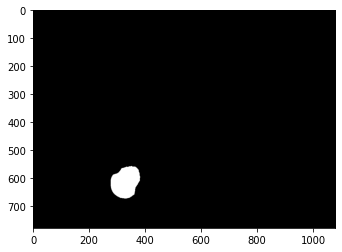

torch.Size([777, 1080])
tensor(26)


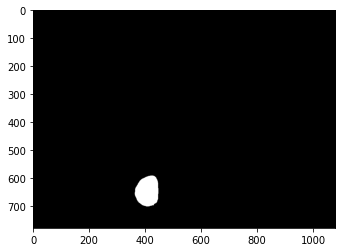

torch.Size([777, 1080])
tensor(25)


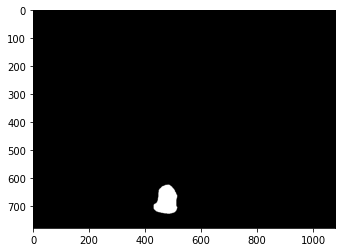

torch.Size([777, 1080])
tensor(21)


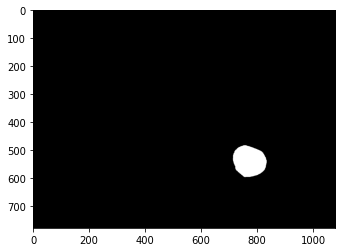

torch.Size([777, 1080])
tensor(22)


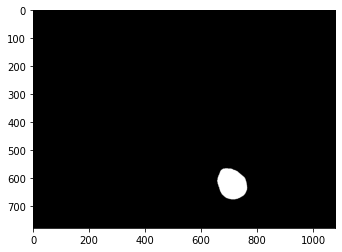

torch.Size([777, 1080])
tensor(23)


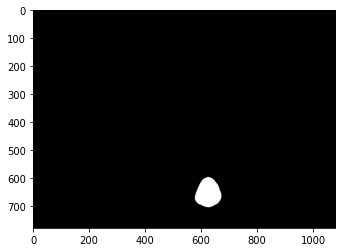

torch.Size([777, 1080])
tensor(24)


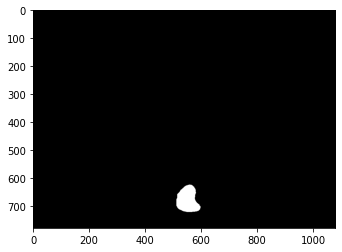

In [ ]:
for i in range(len(labels)):
    out = im[:,:,i]
    print(out.shape)
    print(labels[i])
    plt.imshow(out,cmap='gray')
    plt.show()


In [ ]:
# select device (whether GPU or CPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = maskrcnn_resnet50_fpn(pretrained=False)
    
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,hidden_layer,num_classes)

    return model

In [ ]:
# Number of categories and a background
num_classes = 1+16
model = get_model_instance_segmentation(num_classes)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
samples = len(dataset)
test_counts = int(samples*.2)
train_counts = samples-test_counts
train_set, val_set = torch.utils.data.random_split(dataset, [train_counts, test_counts])

In [ ]:
device

device(type='cuda')

In [ ]:
# number of epochs
num_epochs = 20
model.to(device)
# parameters
params = [p for p in model.parameters() if p.requires_grad]
# optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.08)
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler which decreases the learning rate by
# 10x every 10 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
#                                                step_size=10,
#                                                gamma=0.1)

In [ ]:
# Train DataLoader
train_data_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=1,
                                          shuffle=False,
                                          collate_fn = collate_fn,
#                                           num_workers=2
                                          )

val_data_loader = torch.utils.data.DataLoader(val_set,
                                          batch_size=1,
                                          shuffle=False,
                                          collate_fn = collate_fn,
#                                           num_workers=2
                                          )

total_batches = len(train_data_loader)

In [ ]:
# GOT A LIST 
# with index 0 as tensor # inside tuple
# with index 1 as labels # inside it dict
# so [0][0] used to call inside values

In [ ]:
apple=iter(train_data_loader)
ball=next(apple)
ball[0][0].shape

torch.Size([3, 777, 1080])

In [ ]:
ball

((tensor([[[0.6667, 0.6667, 0.6667,  ..., 0.6667, 0.6667, 0.6667],
           [0.6667, 0.6667, 0.6667,  ..., 0.6667, 0.6667, 0.6667],
           [0.6667, 0.6667, 0.6667,  ..., 0.6667, 0.6667, 0.6667],
           ...,
           [0.6667, 0.6667, 0.6667,  ..., 0.6667, 0.6667, 0.6667],
           [0.6667, 0.6667, 0.6667,  ..., 0.6667, 0.6667, 0.6667],
           [0.6667, 0.6667, 0.6667,  ..., 0.6667, 0.6667, 0.6667]],
  
          [[0.7490, 0.7490, 0.7490,  ..., 0.7490, 0.7490, 0.7490],
           [0.7490, 0.7490, 0.7490,  ..., 0.7490, 0.7490, 0.7490],
           [0.7490, 0.7490, 0.7490,  ..., 0.7490, 0.7490, 0.7490],
           ...,
           [0.7490, 0.7490, 0.7490,  ..., 0.7490, 0.7490, 0.7490],
           [0.7490, 0.7490, 0.7490,  ..., 0.7490, 0.7490, 0.7490],
           [0.7490, 0.7490, 0.7490,  ..., 0.7490, 0.7490, 0.7490]],
  
          [[0.7922, 0.7922, 0.7922,  ..., 0.7922, 0.7922, 0.7922],
           [0.7922, 0.7922, 0.7922,  ..., 0.7922, 0.7922, 0.7922],
           [0.7922, 0.

In [ ]:
pic2=ball[0][0].numpy()
print(pic2.shape)
x = np.moveaxis(pic2, 0, -1)
print(x.shape)

(3, 777, 1080)
(777, 1080, 3)


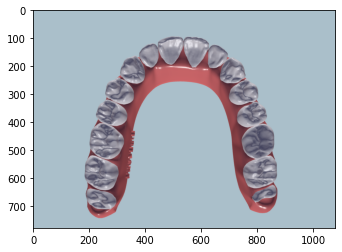

In [ ]:
plt.imshow(x)

In [ ]:
ball[1][0].keys()

dict_keys(['boxes', 'labels', 'masks'])

In [ ]:
ball[1][0]['labels']

tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
len(ball[1][0]['masks'])

777

In [ ]:
ball[1][0]['masks'][0].shape

(1080, 12)

In [ ]:
dataset[1][1]['masks'].shape

(777, 1080, 14)

In [ ]:
dataset[1][1]['masks'][:,:,1].shape

(777, 1080)

In [ ]:
ball[1][0]['masks'].shape

(777, 1080, 12)

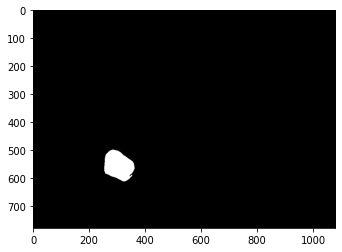

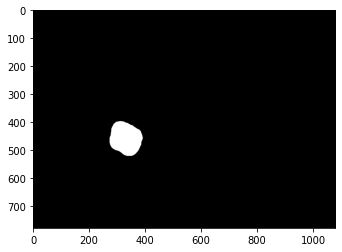

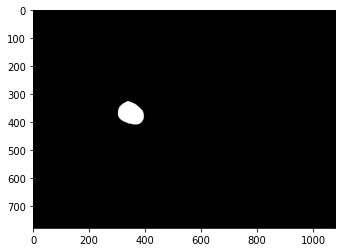

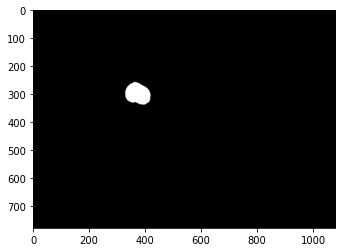

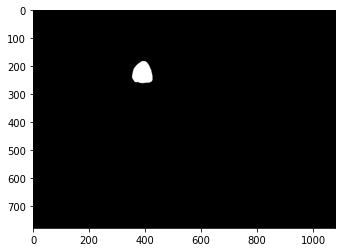

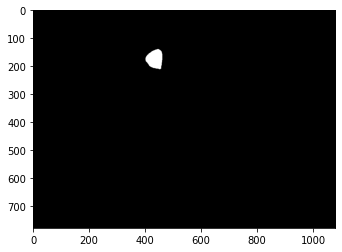

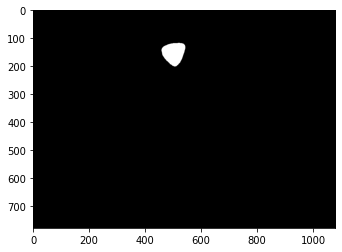

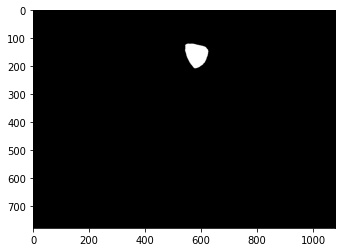

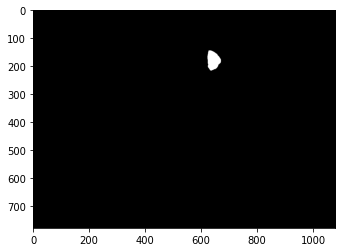

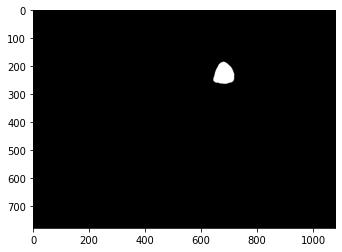

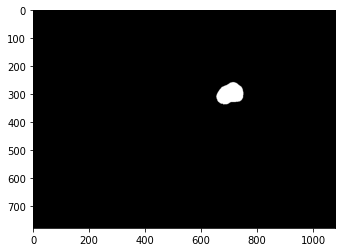

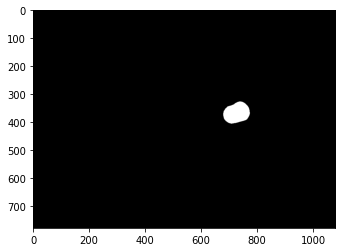

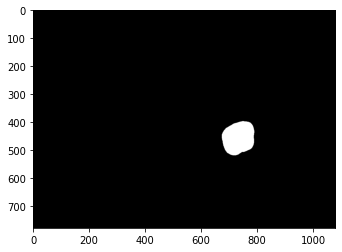

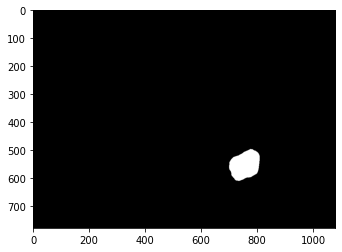

In [ ]:
for i in range(0,14):
  plt.imshow(ball[1][0]['masks'][:,:,i],cmap='gray')
  plt.show()

In [ ]:
num_epochs = 1
for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, val_data_loader, device=device)

Epoch: [0]  [  0/159]  eta: 0:02:37  lr: 0.000037  loss: 5.2063 (5.2063)  loss_classifier: 2.9081 (2.9081)  loss_box_reg: 0.2909 (0.2909)  loss_mask: 1.2379 (1.2379)  loss_objectness: 0.6989 (0.6989)  loss_rpn_box_reg: 0.0705 (0.0705)  time: 0.9874  data: 0.1365  max mem: 1242
Epoch: [0]  [ 10/159]  eta: 0:01:58  lr: 0.000353  loss: 4.6698 (4.8389)  loss_classifier: 2.7900 (2.7301)  loss_box_reg: 0.2073 (0.2005)  loss_mask: 0.9308 (1.1114)  loss_objectness: 0.6967 (0.6972)  loss_rpn_box_reg: 0.1096 (0.0997)  time: 0.7981  data: 0.4679  max mem: 1526
Epoch: [0]  [ 20/159]  eta: 0:01:50  lr: 0.000669  loss: 4.2037 (3.9486)  loss_classifier: 2.3378 (2.0599)  loss_box_reg: 0.1899 (0.1945)  loss_mask: 0.7389 (0.9011)  loss_objectness: 0.6937 (0.6929)  loss_rpn_box_reg: 0.0882 (0.1002)  time: 0.7866  data: 0.5074  max mem: 1528
Epoch: [0]  [ 30/159]  eta: 0:01:38  lr: 0.000985  loss: 2.2118 (3.3278)  loss_classifier: 0.8549 (1.6420)  loss_box_reg: 0.2035 (0.2020)  loss_mask: 0.4953 (0.7290) 

KeyError: ignored

In [ ]:
# pick one image from the test set
img, _ = train_set[0]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

In [ ]:
prediction

[{'boxes': tensor([[324.1881, 155.2725, 405.5032, 263.3275],
          [276.6317, 232.2022, 350.4817, 336.4529],
          [250.4225, 308.0315, 329.6252, 384.4807],
          [239.9991, 320.4355, 318.4725, 403.5745],
          [246.8766, 309.0340, 331.8584, 387.8145],
          [378.1331, 119.7394, 462.2940, 202.3721],
          [697.2233, 244.6414, 786.2764, 326.4615],
          [645.4542, 174.4894, 734.1553, 255.3877],
          [365.9249, 145.7321, 435.3637, 216.9264],
          [263.0579, 282.0428, 342.0580, 356.0747],
          [666.4904, 174.7838, 748.2065, 260.3953],
          [208.9930, 497.4104, 291.5865, 607.6871],
          [326.2273, 171.7025, 411.3435, 252.3282],
          [257.5853, 281.8079, 343.7807, 358.2484],
          [300.0784, 223.3082, 380.2188, 326.4017],
          [310.2165, 194.6721, 388.3971, 293.0472],
          [348.7751, 146.9633, 436.2617, 250.5512],
          [237.4544, 331.2513, 325.1877, 415.3128],
          [735.0498, 329.4056, 824.0184, 414.1825],
   

In [ ]:
img.shape

torch.Size([3, 777, 1080])

In [ ]:
pred11 = img.cpu().detach().numpy()
print(pred11.shape)
y1 = np.moveaxis(pred11, 0, -1 )
print(y1.shape)

(3, 777, 1080)
(777, 1080, 3)


In [ ]:
# torch.save(model.state_dict(), 'testing_5_epochs.pt')

In [ ]:
im = prediction[0]['masks']


In [ ]:
im.shape

torch.Size([100, 1, 777, 1080])

In [ ]:
 im[0,0].shape

torch.Size([777, 1080])

In [ ]:
# y_pred_final=prediction[0]['masks']
# # print('max',torch.squeeze(y_pred_final).shape)
# pred1 = y_pred_final.cpu().detach().numpy()
# # print('npmax',np.unique(pred1))
# print(pred1.shape)
# x = np.moveaxis(pred1, 1,0 )
# print('squeeze',x.shape)
# x[0].shape
# # y = np.moveaxis(x[0], 0, -1 )
# # print(y.shape)
# plt.imshow(x[0,0],cmap='gray')
# plt.show()


im = prediction[0]['masks']
labels = prediction[0]['labels']
labels = [t.item() for t in labels]
# labels.sort()
# print(im.shape)
for i in range(len(labels)):
    # out2 = im[i,0]
    out = im.cpu().detach().numpy()
    x = np.moveaxis(out, 1,0 )
    # print('out',out.shape)
    # out[out>0]=1
    # if labels[i] not in [5,6,7,8,9,10,11,12]:
        # continue
    print(labels[i])
    plt.figure(figsize=(15,10))
    # plt.imshow(img.permute(1,2,0))
    plt.imshow(y1)
    # out1 = out.cpu().detach().numpy()
    # plt.imshow(out1,cmap='jet', alpha=0.2)
    plt.imshow(x[0,i],cmap='jet', alpha=0.2)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# #Later to restore:
# model.load_state_dict(torch.load('/content/gdrive/MyDrive/TEETH/inference/instance_seg_500_epoch.pt'))


<All keys matched successfully>

In [ ]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1qXs_T41ECoC5i5YXJLKaXD2IbzLZHK0k/inference/top_001-200


In [ ]:
ls

after/                                Instance_seg_maskRCNN_topfolder.ipynb
before/                               instance_seg_maskRCNN_topfolder.py
coco_annotation_linux_topfolder.json  shubham
create_coco_annotations.py            testing_5_epochs.pt
detection/                            testing_weights.pt


In [ ]:
# wts = torch.load('instance_seg_500_epoch.pt',map_location=device)
wts = torch.load('/content/gdrive/.shortcut-targets-by-id/1qXs_T41ECoC5i5YXJLKaXD2IbzLZHK0k/inference/top_001-200/testing_5_epochs.pt',map_location=device)
model.load_state_dict(wts)

<All keys matched successfully>

In [ ]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu):

In [ ]:
# pick one image from the test set
img, _ = train_set[10]
# put the model in evaluation mode
# model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])
    

In [ ]:
nooflb=len(prediction[0]['labels'])

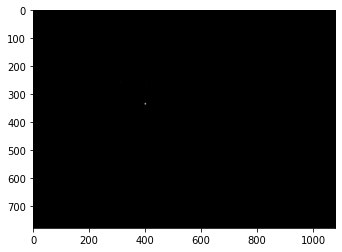

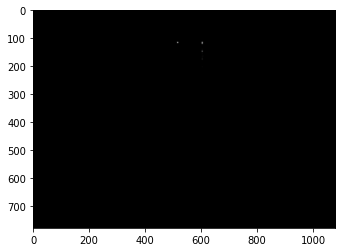

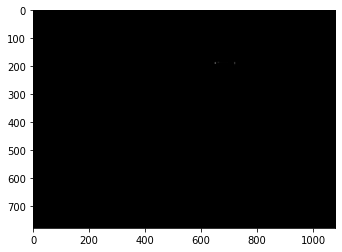

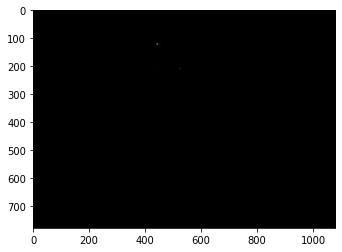

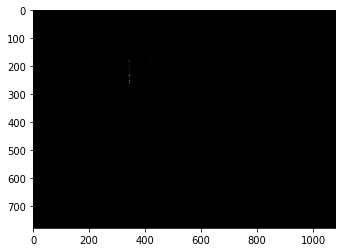

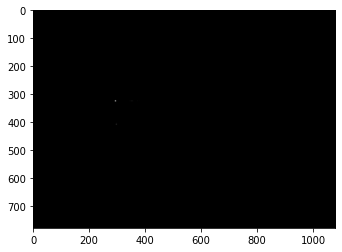

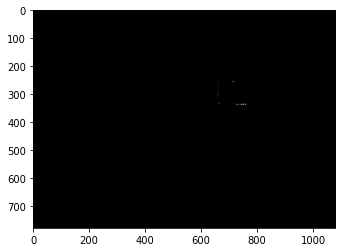

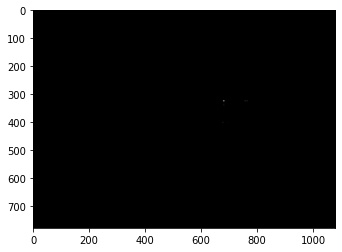

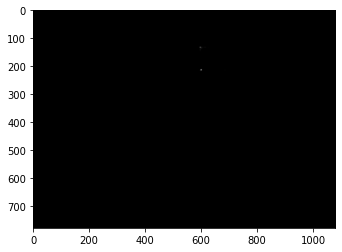

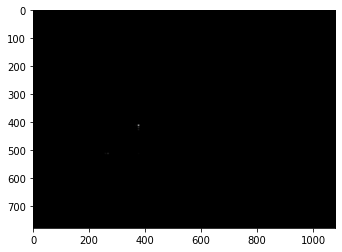

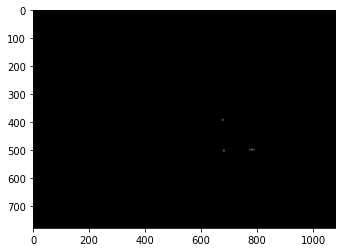

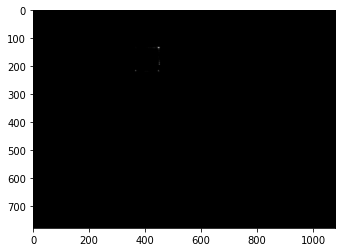

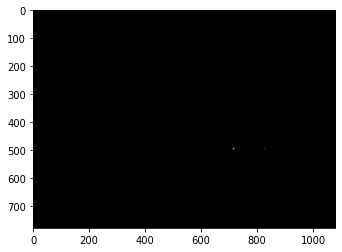

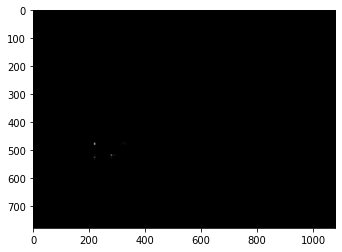

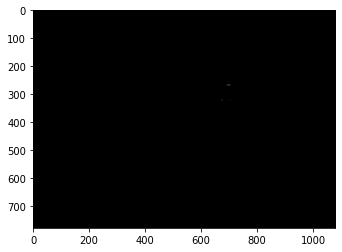

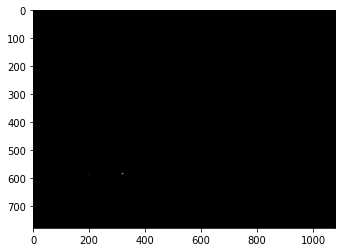

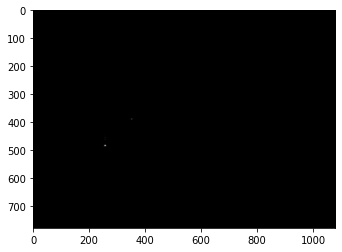

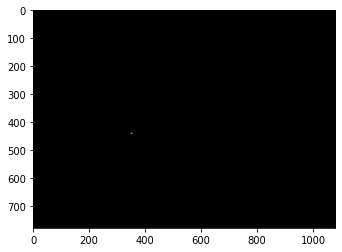

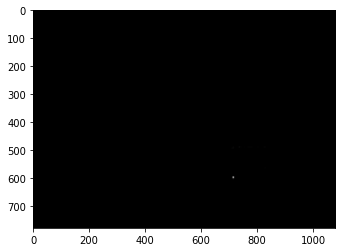

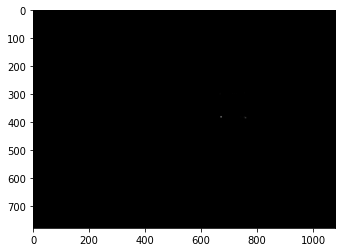

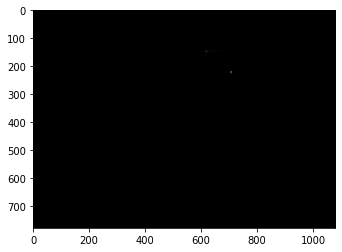

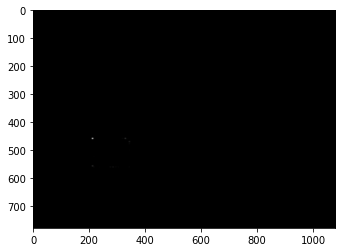

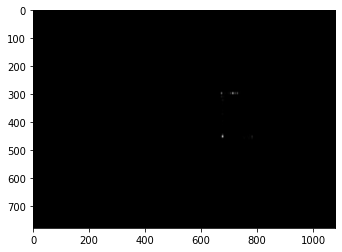

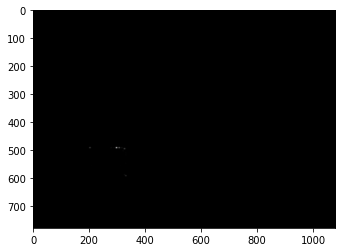

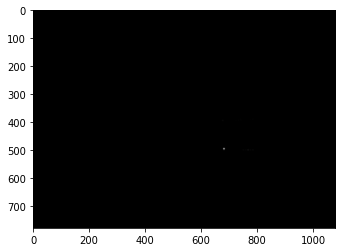

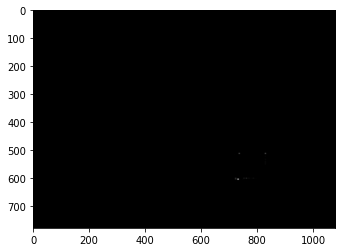

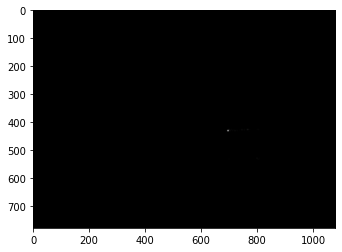

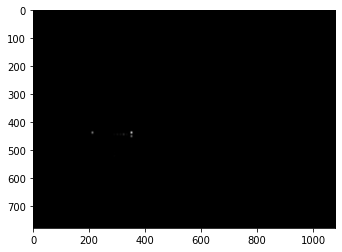

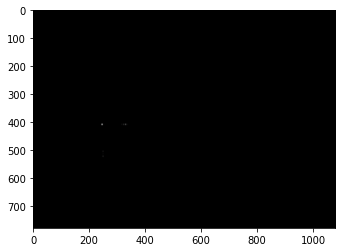

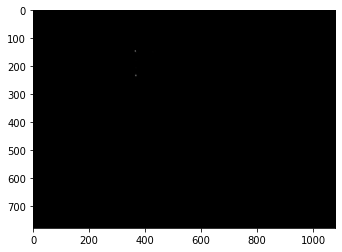

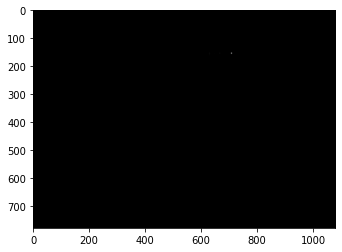

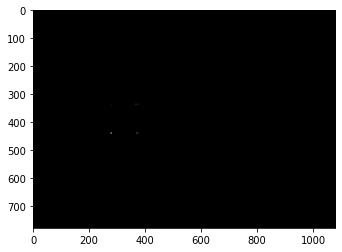

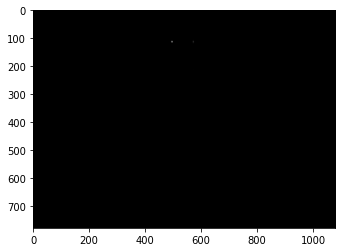

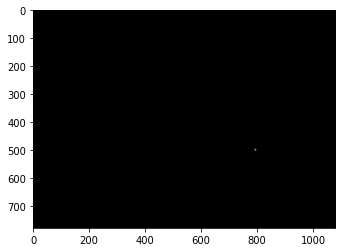

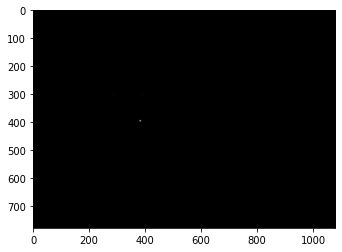

In [ ]:
import matplotlib.pyplot as plt
# out=prediction
y_pred_final=prediction[0]['masks']
pred1 = y_pred_final.cpu().detach().numpy()
# print(pred1.shape)
x = np.moveaxis(pred1, 1,0 )
# print('squeeze',x.shape)
# x[0].shape
for i in range(0,nooflb):
  plt.imshow(x[0,i],cmap='gray')
  plt.show()

In [ ]:
a=img.to(device)

In [ ]:
a.shape

torch.Size([3, 777, 1080])

In [ ]:
out=prediction
y_pred_final=out[0]['masks']
pred1 = y_pred_final.cpu().detach().numpy()
print(pred1.shape)
x = np.moveaxis(pred1, 1,0 )
print(x.shape)
x[0].shape
y = np.moveaxis(x[0], 0, -1 )
y.shape
for i in range(0,len(pred1)):
  plt.imshow(y[:,:,i],cmap='gray')
  plt.show()

(15, 1, 777, 1080)
(1, 15, 777, 1080)


(777, 1080, 15)

In [ ]:
# open an image
from torchvision import transforms

img = Image.open('/content/gdrive/MyDrive/TEETH/inference/xyz.png')
# image=np.array(img)
trans = transforms.ToTensor()
inp=trans(img)
inp = inp.unsqueeze(0) # add pad 
inp=inp.to(device)
with torch.no_grad():
  prediction = model(inp)

(35, 1, 777, 1080)
(1, 35, 777, 1080)
(777, 1080, 35)


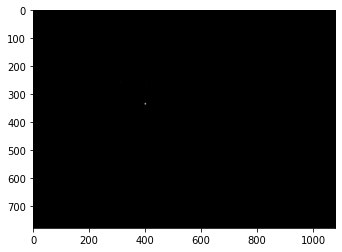

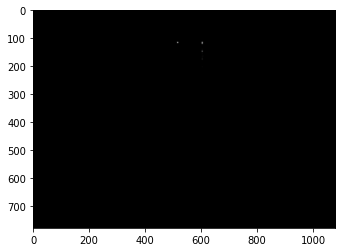

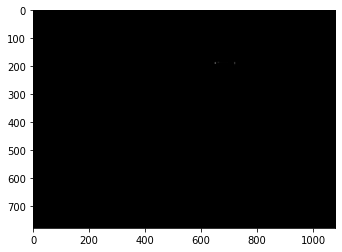

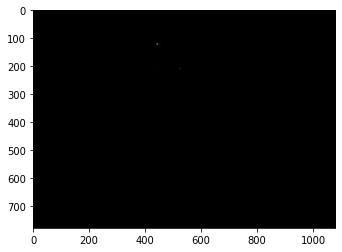

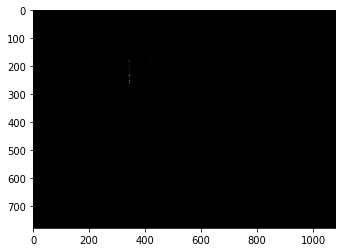

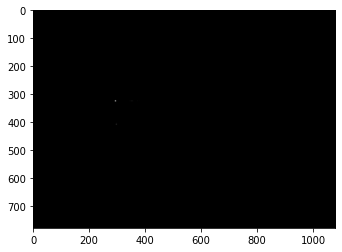

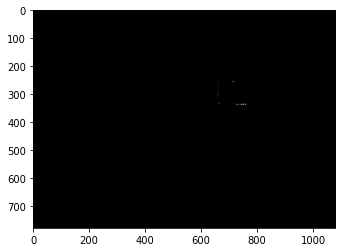

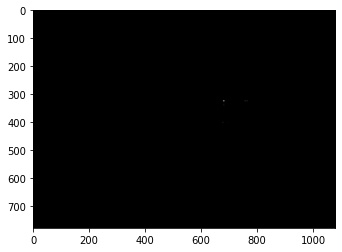

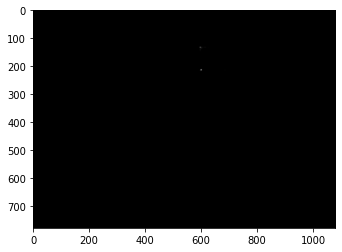

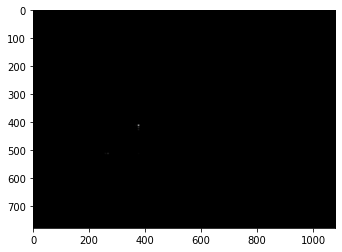

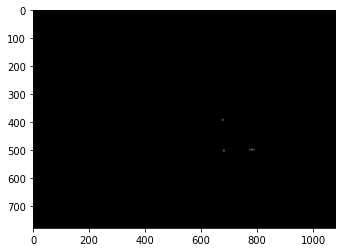

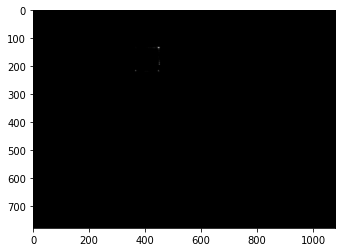

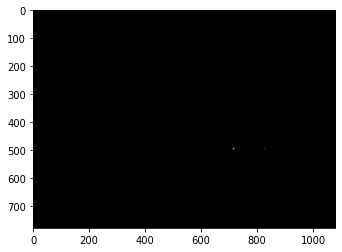

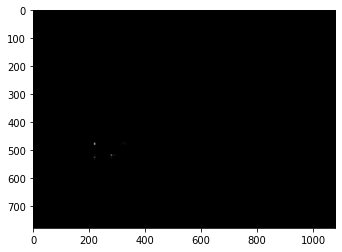

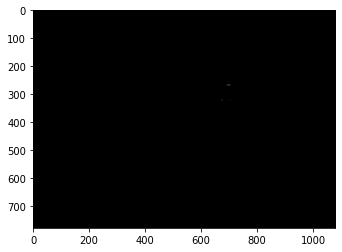

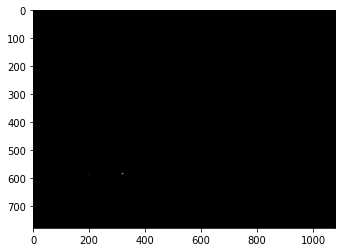

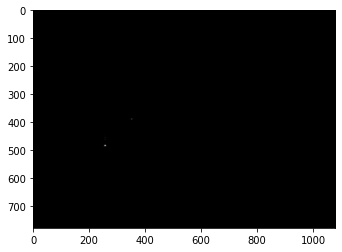

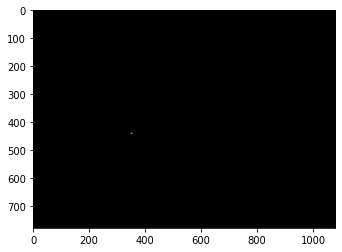

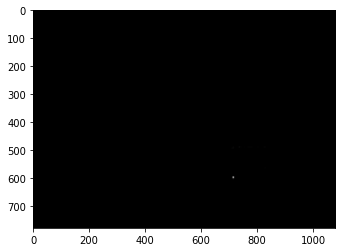

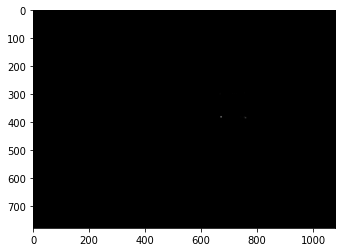

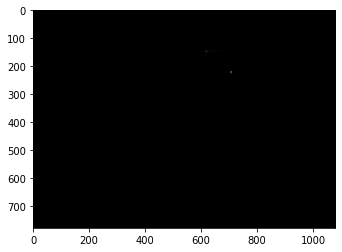

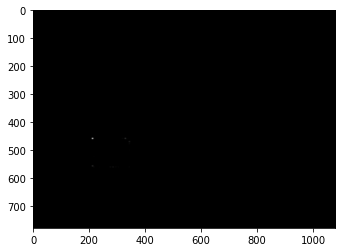

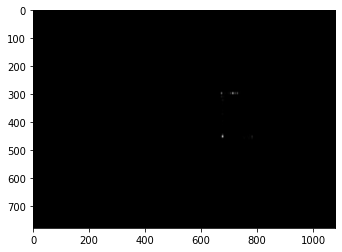

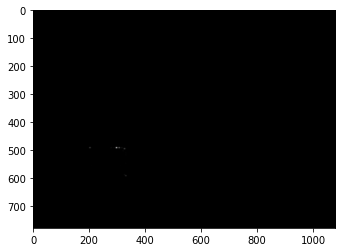

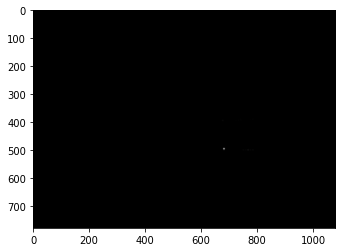

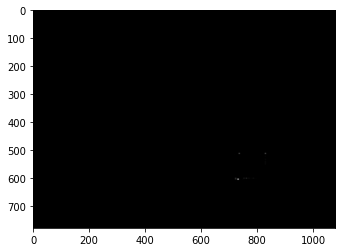

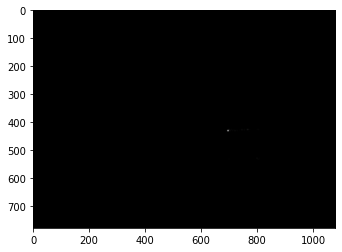

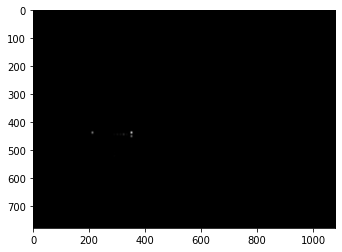

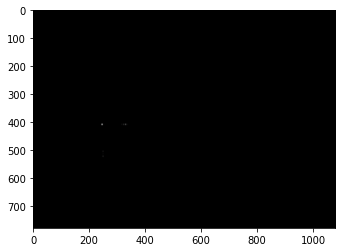

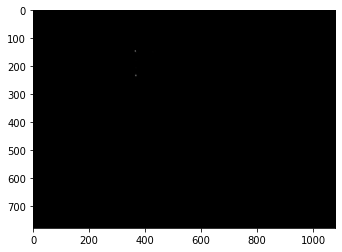

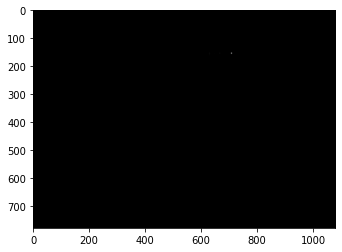

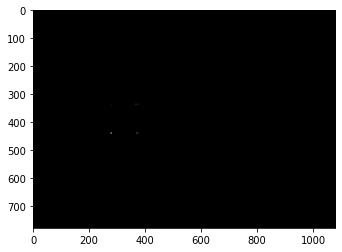

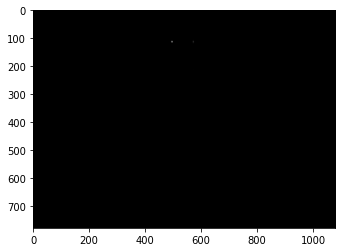

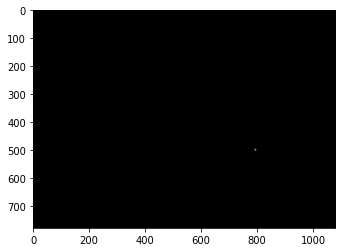

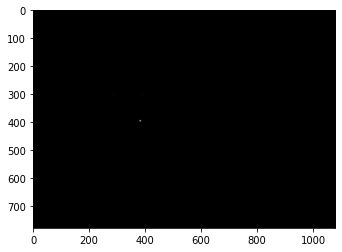

In [ ]:
out=prediction
y_pred_final=out[0]['masks']
pred1 = y_pred_final.cpu().detach().numpy()
print(pred1.shape)
x = np.moveaxis(pred1, 1,0 )
print(x.shape)
x[0].shape
y = np.moveaxis(x[0], 0, -1 )b
print(y.shape)
for i in range(0,len(pred1)):
  plt.imshow(y[:,:,i],cmap='gray')
  plt.show()

torch.Size([17, 1, 777, 1080])
8


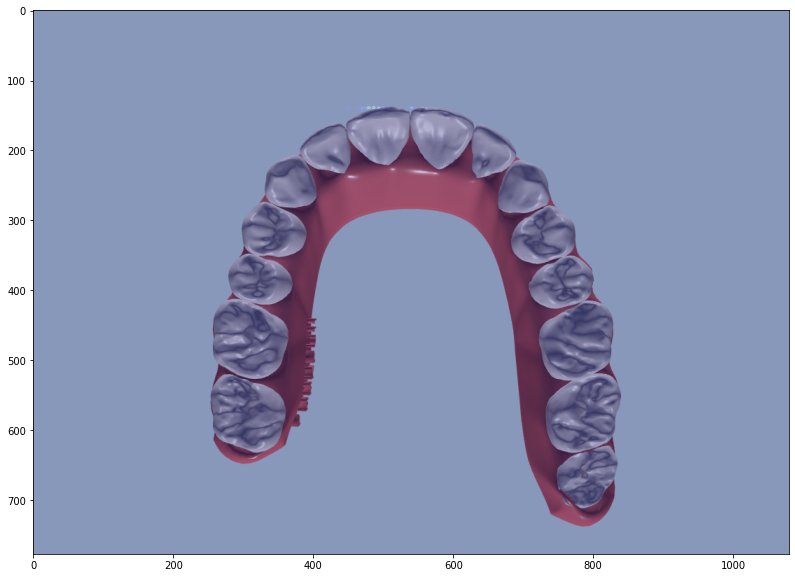

5


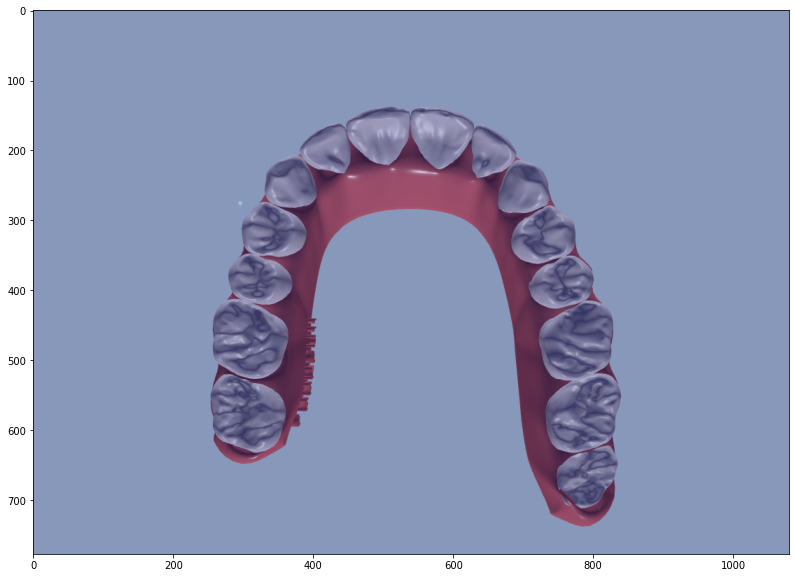

10


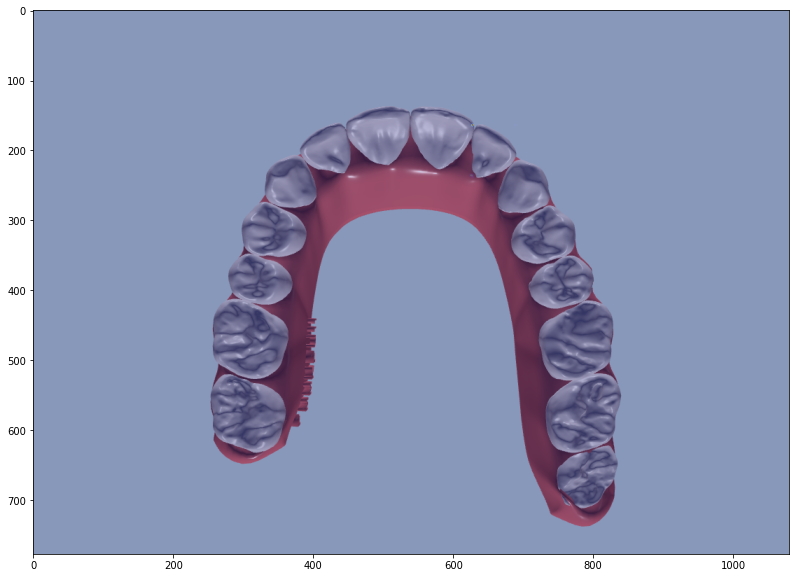

7


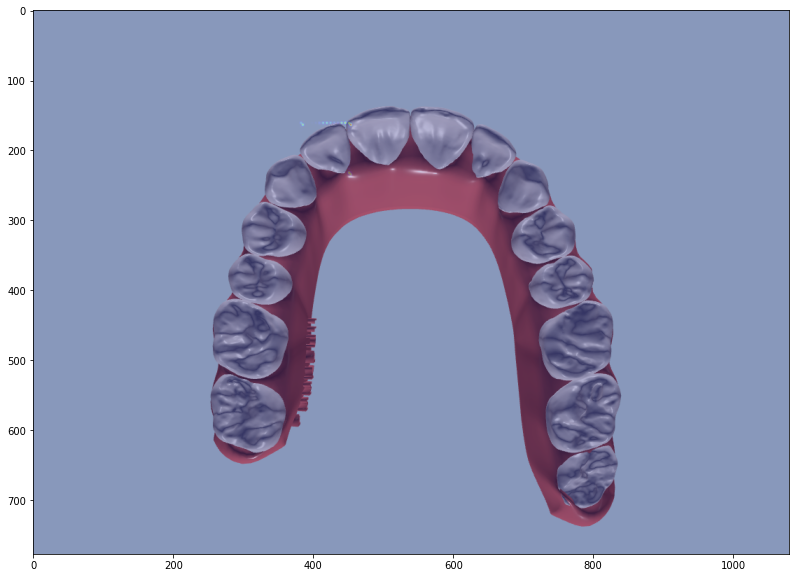

9


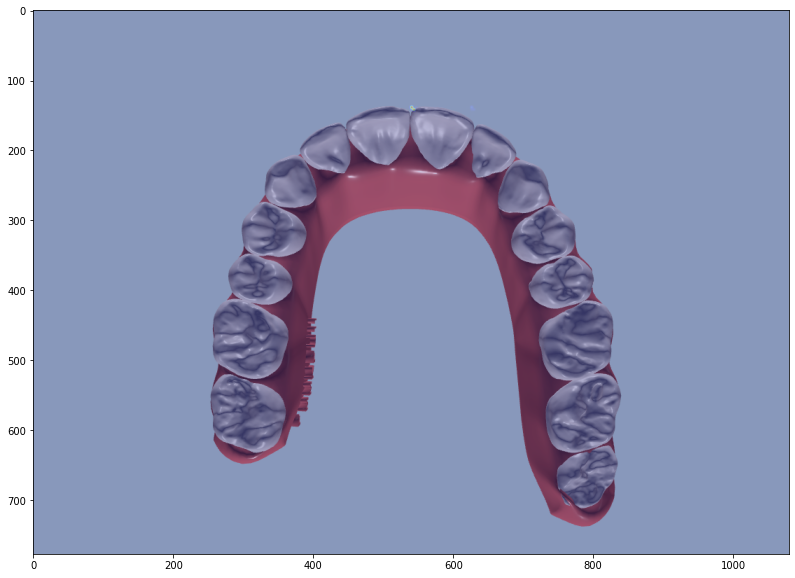

11


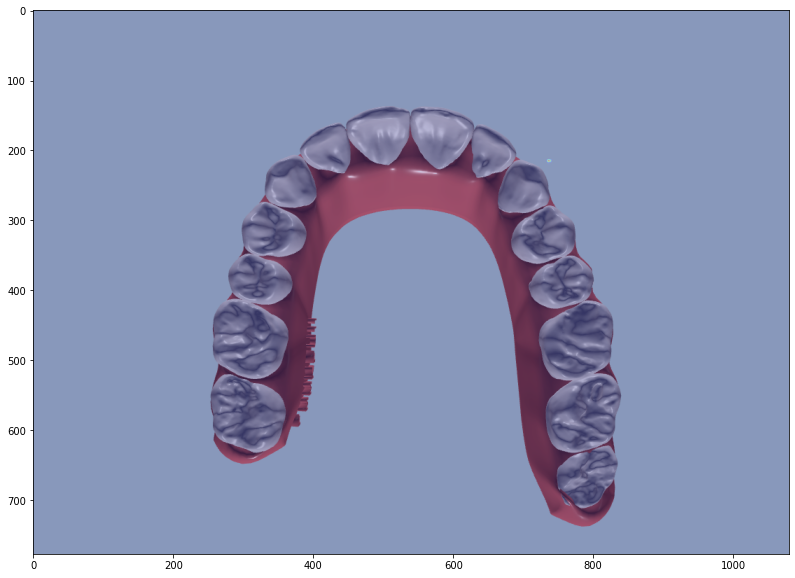

12


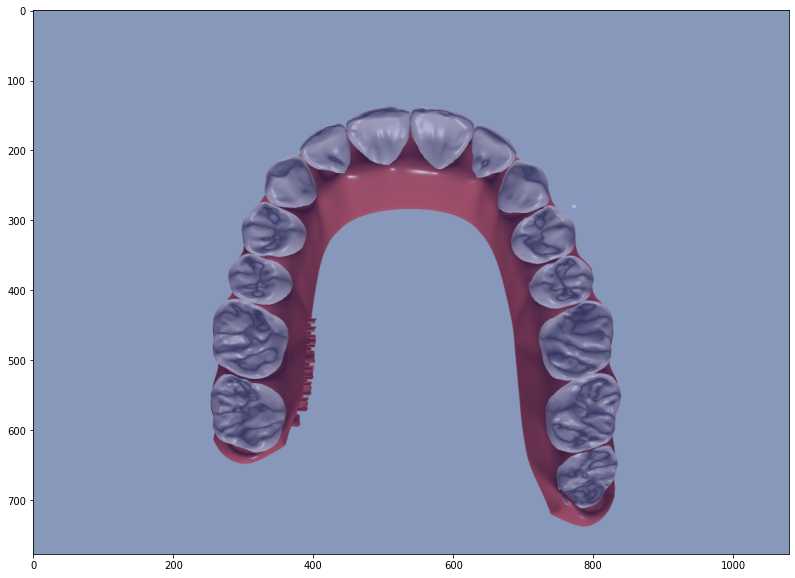

6


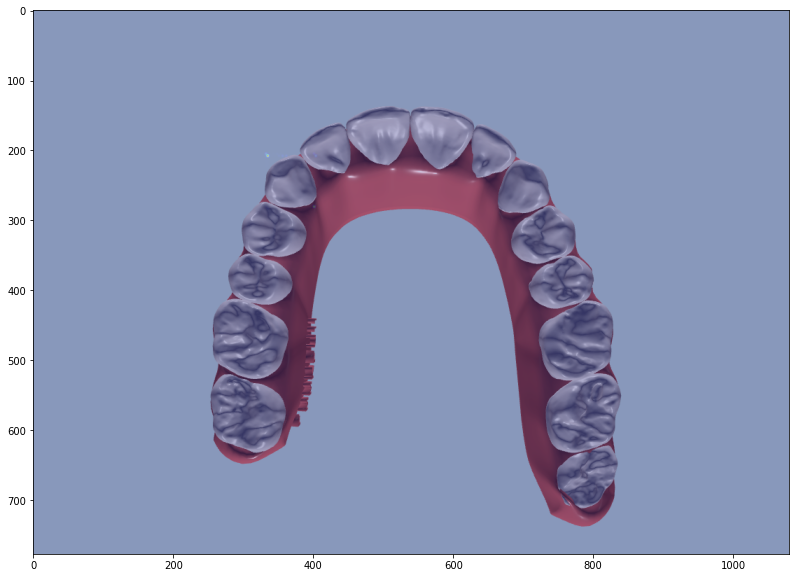

In [ ]:
im = prediction[0]['masks']
labels = prediction[0]['labels']
labels = [t.item() for t in labels]
# labels.sort()
print(im.shape)
for i in range(len(labels)):
    out = im[i,0]
    out[out>0]=1
    if labels[i] not in [5,6,7,8,9,10,11,12]:
        continue
    print(labels[i])
    plt.figure(figsize=(15,10))
    plt.imshow(img.permute(1,2,0))
    plt.imshow(out,cmap='jet', alpha=0.2)
    plt.show()

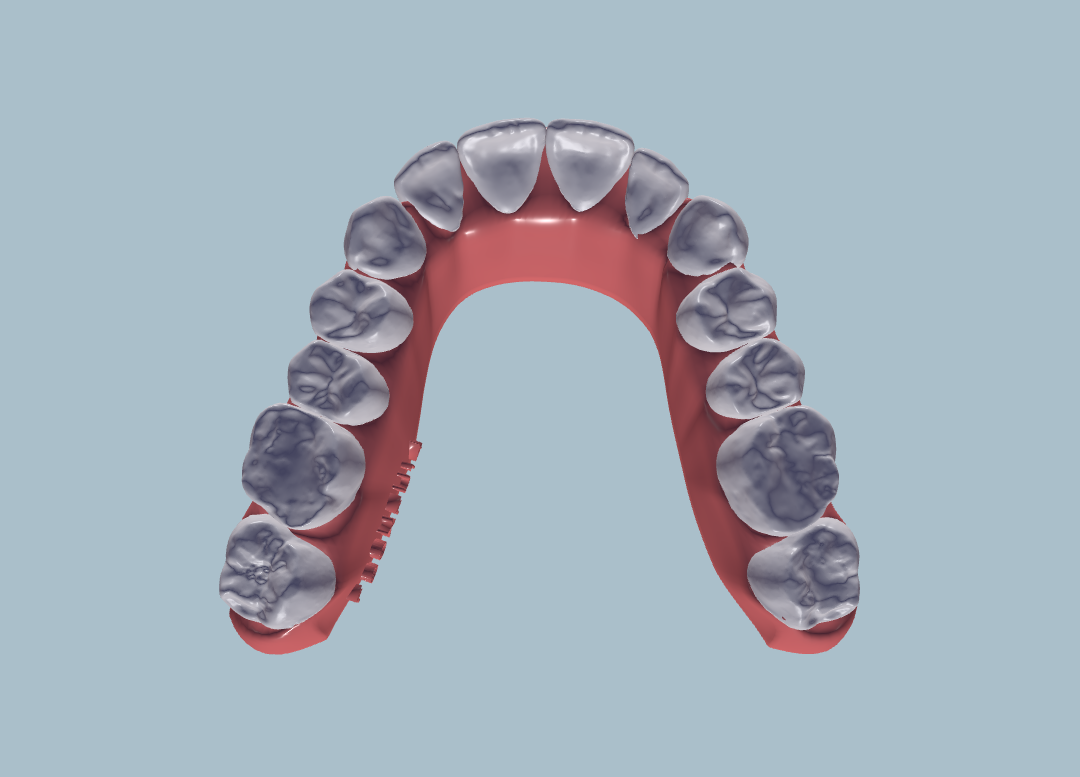

In [ ]:
Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

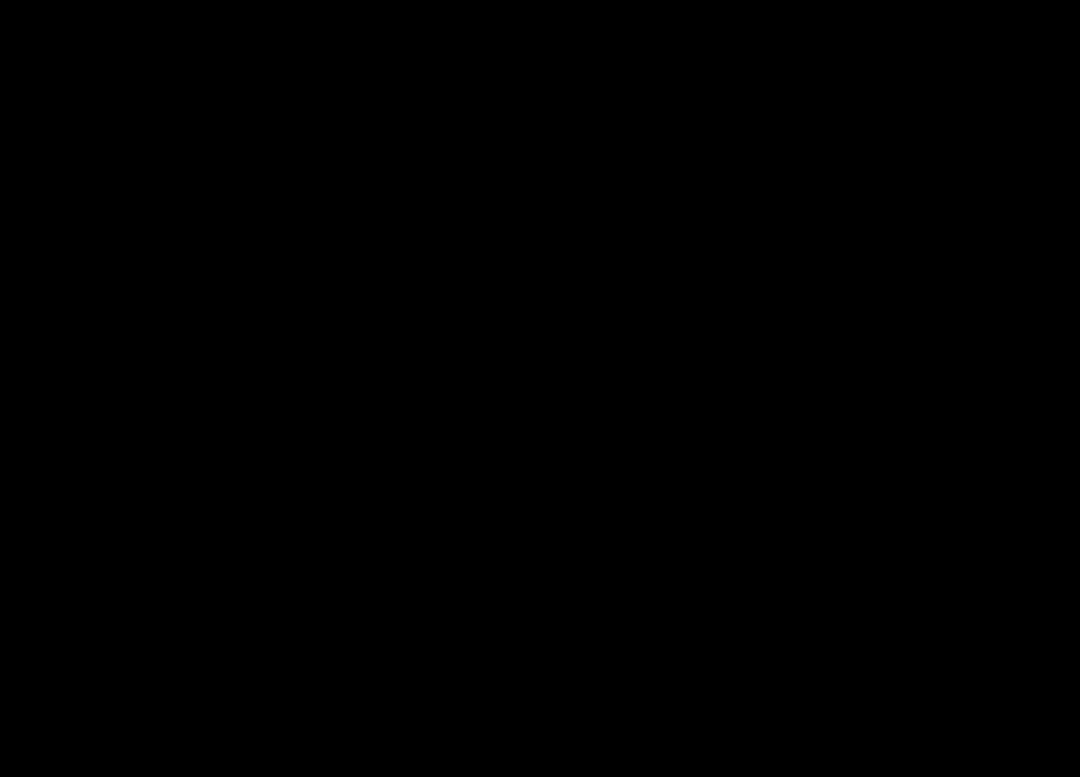

In [ ]:
Image.fromarray(prediction[0]['masks'][1, 0].mul(255).byte().cpu().numpy())

In [ ]:
num_epochs = 1


In [ ]:
# Model training
print('Training model..')
for epoch in range(num_epochs):

    print(f'Epoch no: {epoch}')
    model.train()
    i = 0

    for imgs, annotations in train_data_loader:

        imgs = list(img.to(device) for img in imgs)
        annotations = [{key: value.to(device) for key, value in annotation.items()} for annotation in annotations]
        loss_dict = model(imgs,annotations)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        print(f'Epoch no: {epoch}/{num_epochs-1}, Batch no: {i}/{total_batches}, Loss: {losses}')
        i+=1


Training model..
Epoch no: 0


AttributeError: ignored

In [ ]:
evaluate(model, val_data_loader, device=device)

creating index...
index created!


RuntimeError: ignored